In [1]:
import pandas as pd
import numpy as np
import math
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('vader_lexicon')
import seaborn as sns
import matplotlib.pyplot as plt

/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/bharatagrawal/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/bharatagrawal/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


https://www.youtube.com/watch?v=QpzMWQvxXWk

In [2]:
df = pd.read_csv("Women_s_E-Commerce_Clothing_Reviews_1594_1.csv", sep=';', on_bad_lines='skip')

In [3]:
df['Review.Text'].fillna('',inplace = True)
df.insert(0, 'Serial Number', range(1, len(df) + 1))
df.head()

,Serial Number,Unnamed: 0,Clothing.ID,Age,Title,Review.Text,Rating,Recommended.IND,Positive.Feedback.Count,Division.Name,Department.Name,Class.Name
0,1,1,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,2,2,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,3,3,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,4,4,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,5,5,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [4]:
example = df["Review.Text"][50]
print(example)
tokens = nltk.word_tokenize(example)
tagged = nltk.pos_tag(tokens)
tagged[:10]

This is a cute top that can transition easily from summer to fall. it fits well, nice print and it's comfortable. i tried this on in the store, but did not purchase it because the color washed me out. this is not the best color for a blonde. would look much better on a brunette. if this was in a different color i most likely would have purchased it.


[('This', 'DT'),
 ('is', 'VBZ'),
 ('a', 'DT'),
 ('cute', 'JJ'),
 ('top', 'NN'),
 ('that', 'WDT'),
 ('can', 'MD'),
 ('transition', 'VB'),
 ('easily', 'RB'),
 ('from', 'IN')]

## VADER SENTIMENT ANALYIS

In [5]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()
sia.polarity_scores("Most happy")

{'neg': 0.0, 'neu': 0.2, 'pos': 0.8, 'compound': 0.6115}

In [6]:
example = "I can't find a job I hate it"
sia.polarity_scores(example)

{'neg': 0.0, 'neu': 0.572, 'pos': 0.428, 'compound': 0.4585}

## Run Polarity score for the entire dataset

In [7]:
res = {}
for i,rows in tqdm(df.iterrows(),total = len(df)):
    text = rows['Review.Text']
    myid = rows['Serial Number']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/23486 [00:00<?, ?it/s]

In [8]:
vader_polarity_scores = pd.DataFrame(res).T
vader_polarity_scores = vader_polarity_scores.reset_index().rename(columns = {"index" : "Serial Number"}).merge(df,how='left')
# Now we have orginial dataset and Vader Score
vader_polarity_scores

,Serial Number,neg,neu,pos,compound,Unnamed: 0,Clothing.ID,Age,Title,Review.Text,Rating,Recommended.IND,Positive.Feedback.Count,Division.Name,Department.Name,Class.Name
0,1,0.000,0.272,0.728,0.8932,1,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,2,0.000,0.664,0.336,0.9729,2,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,3,0.027,0.792,0.181,0.9427,3,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,4,0.226,0.340,0.434,0.5727,4,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,5,0.000,0.700,0.300,0.9291,5,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23481,23482,0.065,0.547,0.388,0.9152,23482,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,23483,0.068,0.735,0.197,0.6652,23483,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,23484,0.000,0.704,0.296,0.9343,23484,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,23485,0.068,0.812,0.120,0.6692,23485,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


## Plot the Vader Scores

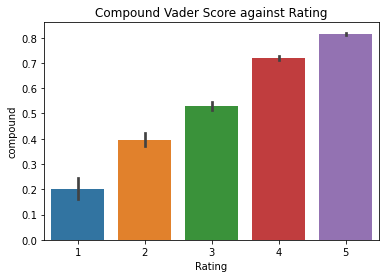

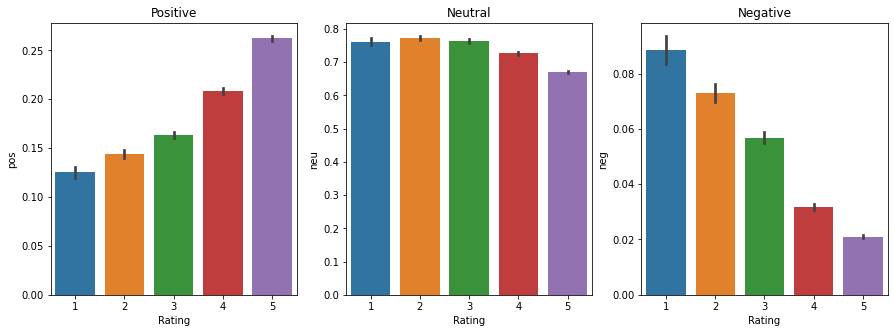

In [9]:
ax_main = sns.barplot(data= vader_polarity_scores,x="Rating",y="compound")
ax_main.set_title("Compound Vader Score against Rating")
plt.show()

fig, axs = plt.subplots(1, 3, figsize=(15,5))
sns.barplot(data= vader_polarity_scores,x="Rating",y="pos",ax=axs[0])
sns.barplot(data= vader_polarity_scores,x="Rating",y="neu",ax=axs[1])
sns.barplot(data= vader_polarity_scores,x="Rating",y="neg",ax=axs[2])
axs[0].set_title("Positive")
axs[1].set_title("Neutral")
axs[2].set_title("Negative")
plt.show()

## Roberta Pretained Model

In [10]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

MODEL = f'cardiffnlp/twitter-roberta-base-sentiment-latest'
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [11]:
#old Vader Model Score
print(example)

sia.polarity_scores(example)

I can't find a job I hate it


{'neg': 0.0, 'neu': 0.572, 'pos': 0.428, 'compound': 0.4585}

In [12]:
# Roberta Model Score
#example
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
score_dictonary = {
    "roberta_neg" : scores[0],
    "roberta_neu" : scores[1],
    "roberta_pos" : scores[2]
}
score_dictonary

{'roberta_neg': 0.93280655,
 'roberta_neu': 0.05934223,
 'roberta_pos': 0.0078511555}

In [13]:
#function to apply to our dataset
def polarity_score_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    score_dictonary = {
    "roberta_neg" : scores[0],
    "roberta_neu" : scores[1],
    "roberta_pos" : scores[2]
    }
    return score_dictonary

In [19]:
roberta_res = {}
for i,rows in tqdm(df.iterrows(),total = len(df)):
    text = rows['Review.Text']
    myid = rows['Serial Number']
    roberta_res[myid] = polarity_score_roberta(text)
    
roberta_res

  0%|          | 0/23486 [00:00<?, ?it/s]

{1: {'roberta_neg': 0.005285272,
  'roberta_neu': 0.010743879,
  'roberta_pos': 0.9839708},
 2: {'roberta_neg': 0.0064565986,
  'roberta_neu': 0.013494091,
  'roberta_pos': 0.9800494},
 3: {'roberta_neg': 0.052009303,
  'roberta_neu': 0.11510763,
  'roberta_pos': 0.8328831},
 4: {'roberta_neg': 0.0043290644,
  'roberta_neu': 0.00610733,
  'roberta_pos': 0.9895637},
 5: {'roberta_neg': 0.002341144,
  'roberta_neu': 0.010248518,
  'roberta_pos': 0.98741037},
 6: {'roberta_neg': 0.4769815,
  'roberta_neu': 0.3224219,
  'roberta_pos': 0.20059672},
 7: {'roberta_neg': 0.010114552,
  'roberta_neu': 0.11492462,
  'roberta_pos': 0.87496084},
 8: {'roberta_neg': 0.008890605,
  'roberta_neu': 0.18091989,
  'roberta_pos': 0.8101895},
 9: {'roberta_neg': 0.0073751686,
  'roberta_neu': 0.028005902,
  'roberta_pos': 0.9646189},
 10: {'roberta_neg': 0.01148631,
  'roberta_neu': 0.24364685,
  'roberta_pos': 0.7448669},
 11: {'roberta_neg': 0.8929174,
  'roberta_neu': 0.09720746,
  'roberta_pos': 0.009

In [20]:
roberta_polarity_scores = pd.DataFrame(roberta_res).T
roberta_polarity_scores = roberta_polarity_scores.reset_index().rename(columns = {"index" : "Serial Number"}).merge(vader_polarity_scores,how='left')
# Now we have orginial dataset and Vader Score
roberta_polarity_scores

,Serial Number,roberta_neg,roberta_neu,roberta_pos,neg,neu,pos,compound,Unnamed: 0,Clothing.ID,Age,Title,Review.Text,Rating,Recommended.IND,Positive.Feedback.Count,Division.Name,Department.Name,Class.Name
0,1,0.005285,0.010744,0.983971,0.000,0.272,0.728,0.8932,1,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,2,0.006457,0.013494,0.980049,0.000,0.664,0.336,0.9729,2,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,3,0.052009,0.115108,0.832883,0.027,0.792,0.181,0.9427,3,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,4,0.004329,0.006107,0.989564,0.226,0.340,0.434,0.5727,4,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,5,0.002341,0.010249,0.987410,0.000,0.700,0.300,0.9291,5,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23481,23482,0.003223,0.006932,0.989845,0.065,0.547,0.388,0.9152,23482,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,23483,0.034540,0.149451,0.816009,0.068,0.735,0.197,0.6652,23483,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,23484,0.447361,0.357314,0.195325,0.000,0.704,0.296,0.9343,23484,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,23485,0.781399,0.182102,0.036499,0.068,0.812,0.120,0.6692,23485,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


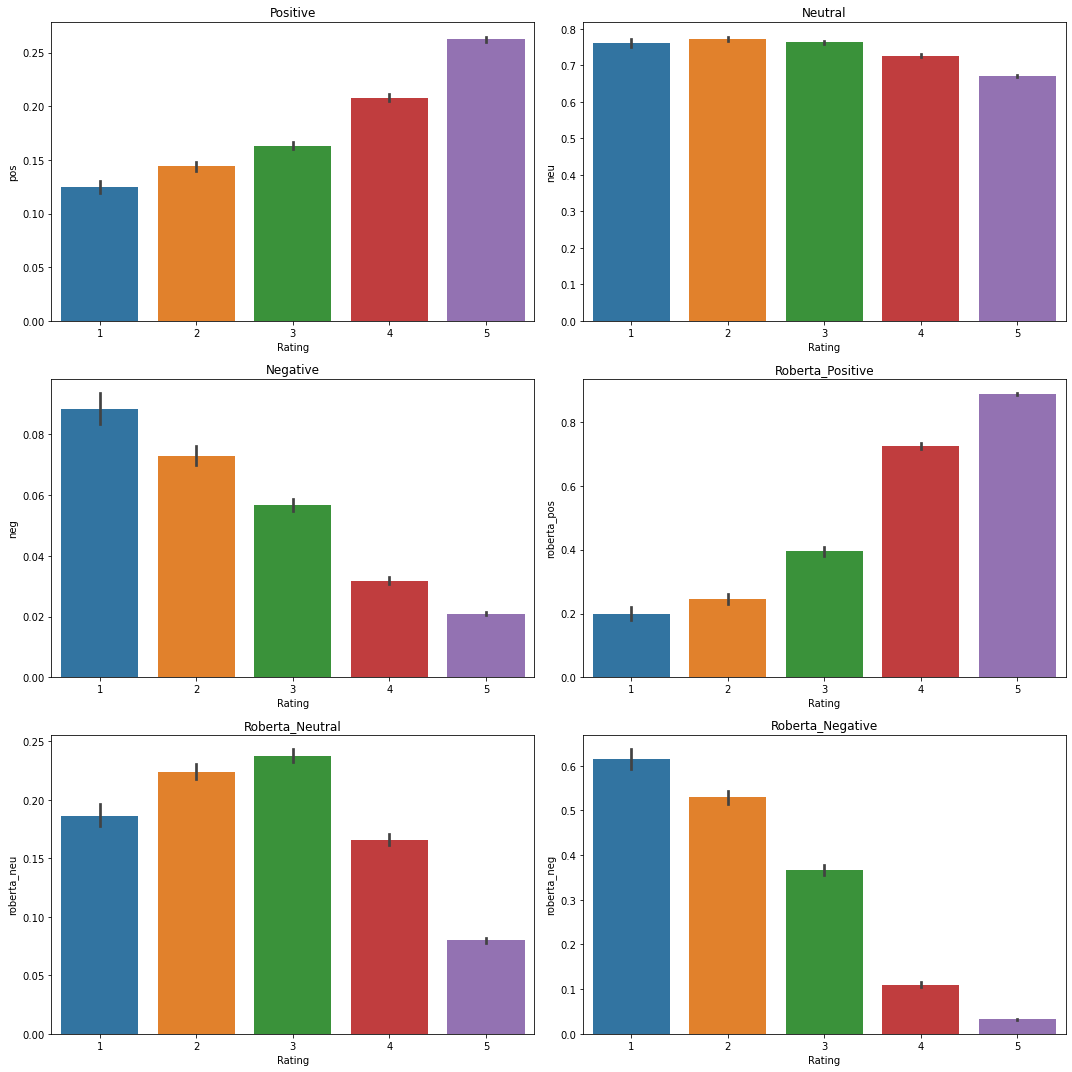

In [30]:
fig, axs = plt.subplots(3, 2, figsize=(15, 15))  # Adjusted figsize for better visibility

sns.barplot(data=roberta_polarity_scores, x="Rating", y="pos", ax=axs[0, 0])
sns.barplot(data=roberta_polarity_scores, x="Rating", y="neu", ax=axs[0, 1])
sns.barplot(data=roberta_polarity_scores, x="Rating", y="neg", ax=axs[1, 0])
sns.barplot(data=roberta_polarity_scores, x="Rating", y="roberta_pos", ax=axs[1, 1])
sns.barplot(data=roberta_polarity_scores, x="Rating", y="roberta_neu", ax=axs[2, 0])
sns.barplot(data=roberta_polarity_scores, x="Rating", y="roberta_neg", ax=axs[2, 1])

axs[0, 0].set_title("Positive")
axs[0, 1].set_title("Neutral")
axs[1, 0].set_title("Negative")
axs[1, 1].set_title("Roberta_Positive")
axs[2, 0].set_title("Roberta_Neutral")
axs[2, 1].set_title("Roberta_Negative")

plt.tight_layout()  # Adjusts subplots to fit into the figure area.
plt.show()


In [33]:
df.to_csv("roberta_polarity_scores", index=False) 
##So I can furthur use it for Recommendation System and Exploratory data Analysis 
